# Sentence Tokenization

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import numpy as np
import matplotlib.pyplot as plt

In [2]:
english_file = "data/english.txt"
kannada_file = "data/kannada.txt"

START_TOKEN = ""
PADDING_TOKEN = ""
END_TOKEN = ""

kannada_vocabulary = [
    START_TOKEN,
    " ",
    "!",
    '"',
    "#",
    "$",
    "%",
    "&",
    "'",
    "(",
    ")",
    "*",
    "+",
    ",",
    "-",
    ".",
    "/",
    "0",
    "1",
    "2",
    "3",
    "4",
    "5",
    "6",
    "7",
    "8",
    "9",
    ":",
    "<",
    "=",
    ">",
    "?",
    "ˌ",
    "ँ",
    "ఆ",
    "ఇ",
    "ా",
    "ి",
    "ీ",
    "ు",
    "ూ",
    "ಅ",
    "ಆ",
    "ಇ",
    "ಈ",
    "ಉ",
    "ಊ",
    "ಋ",
    "ೠ",
    "ಌ",
    "ಎ",
    "ಏ",
    "ಐ",
    "ಒ",
    "ಓ",
    "ಔ",
    "ಕ",
    "ಖ",
    "ಗ",
    "ಘ",
    "ಙ",
    "ಚ",
    "ಛ",
    "ಜ",
    "ಝ",
    "ಞ",
    "ಟ",
    "ಠ",
    "ಡ",
    "ಢ",
    "ಣ",
    "ತ",
    "ಥ",
    "ದ",
    "ಧ",
    "ನ",
    "ಪ",
    "ಫ",
    "ಬ",
    "ಭ",
    "ಮ",
    "ಯ",
    "ರ",
    "ಱ",
    "ಲ",
    "ಳ",
    "ವ",
    "ಶ",
    "ಷ",
    "ಸ",
    "ಹ",
    "಼",
    "ಽ",
    "ಾ",
    "ಿ",
    "ೀ",
    "ು",
    "ೂ",
    "ೃ",
    "ೄ",
    "ೆ",
    "ೇ",
    "ೈ",
    "ೊ",
    "ೋ",
    "ೌ",
    "್",
    "ೕ",
    "ೖ",
    "ೞ",
    "ೣ",
    "ಂ",
    "ಃ",
    "೦",
    "೧",
    "೨",
    "೩",
    "೪",
    "೫",
    "೬",
    "೭",
    "೮",
    "೯",
    PADDING_TOKEN,
    END_TOKEN,
]

english_vocabulary = [
    START_TOKEN,
    " ",
    "!",
    '"',
    "#",
    "$",
    "%",
    "&",
    "'",
    "(",
    ")",
    "*",
    "+",
    ",",
    "-",
    ".",
    "/",
    "0",
    "1",
    "2",
    "3",
    "4",
    "5",
    "6",
    "7",
    "8",
    "9",
    ":",
    "<",
    "=",
    ">",
    "?",
    "@",
    "A",
    "B",
    "C",
    "D",
    "E",
    "F",
    "G",
    "H",
    "I",
    "J",
    "K",
    "L",
    "M",
    "N",
    "O",
    "P",
    "Q",
    "R",
    "S",
    "T",
    "U",
    "V",
    "W",
    "X",
    "Y",
    "Z",
    "[",
    "\\",
    "]",
    "^",
    "_",
    "`",
    "a",
    "b",
    "c",
    "d",
    "e",
    "f",
    "g",
    "h",
    "i",
    "j",
    "k",
    "l",
    "m",
    "n",
    "o",
    "p",
    "q",
    "r",
    "s",
    "t",
    "u",
    "v",
    "w",
    "x",
    "y",
    "z",
    "{",
    "|",
    "}",
    "~",
    PADDING_TOKEN,
    END_TOKEN,
]

In [3]:
text = "ಕನ್ನಡ"
list(text)

['ಕ', 'ನ', '್', 'ನ', 'ಡ']

In [4]:
"ಕ" + "ಾ"

'ಕಾ'

For every one of the English and Kannada vocabulary, we want to create an index. That's a dictionary that maps an integer to a character or a character that maps to an integer. 

In [5]:
index_to_english = {k: v for k, v in enumerate(english_vocabulary)}
index_to_kannada = {k: v for k, v in enumerate(kannada_vocabulary)}
english_to_index = {v: k for k, v in enumerate(english_vocabulary)}
kannada_to_index = {v: k for k, v in enumerate(kannada_vocabulary)}

Now we're going to read the files in the data folder and retrieve the top 100,000 sentences.

In [6]:
with open(english_file, "r") as file:
    english_sentences = file.readlines()
with open(kannada_file, "r") as file:
    kannada_sentences = file.readlines()

# Limit number of sentences
TOTAL_SENTENCES = 100000
english_sentences = english_sentences[:TOTAL_SENTENCES]
kannada_sentences = kannada_sentences[:TOTAL_SENTENCES]
# Remove any whitespaces or newline characters from left and right of sentences
english_sentences = [sentence.strip() for sentence in english_sentences]
kannada_sentences = [sentence.strip() for sentence in kannada_sentences]

print(len(english_sentences))
print(len(kannada_sentences))

100000
100000


In [7]:
english_sentences[:10]

['Hes a scientist.',
 "'But we speak the truth aur ye sach hai ke Gujarat mein vikas pagal hogaya hai,'' Rahul Gandhi further said in Banaskantha",
 '8 lakh crore have been looted.',
 'I read a lot into this as well.',
 "She was found dead with the phone's battery exploded close to her head the following morning.",
 'How did mankind come under Satans rival sovereignty?',
 'And then I became Prime Minister.',
 'What about corruption?',
 'No differences',
 '"""The shooting of the film is 90 percent done."']

In [8]:
kannada_sentences[:10]

['ಇವರು ಸಂಶೋಧಕ ಸ್ವಭಾವದವರು.',
 '"ಆದರೆ ಸತ್ಯ ಹೊರ ಬಂದೇ ಬರುತ್ತದೆ ಎಂದು ಹೇಳಿದ ರಾಹುಲ್ ಗಾಂಧಿ, ""ಸೂರತ್ ಜನರು ಚೀನಾದ ಜತೆ ಸ್ಪರ್ಧೆ ನಡೆಸುತ್ತಿದ್ದಾರೆ"',
 'ಕಳ್ಳತನವಾಗಿದ್ದ 8 ಲಕ್ಷ ರೂ.',
 'ಇದರ ಬಗ್ಗೆ ನಾನೂ ಸಾಕಷ್ಟು ಓದಿದ್ದೇನೆ.',
 'ಆಕೆಯ ತಲೆಯ ಹತ್ತಿರ ಇರಿಸಿಕೊಂಡಿದ್ದ ಫೋನ್\u200cನ ಬ್ಯಾಟರಿ ಸ್ಫೋಟಗೊಂಡು ಆಕೆ ಮೃತಪಟ್ಟಿದ್ದಾಳೆ ಎನ್ನಲಾಗಿದೆ.',
 'ಮಾನವಕುಲವು ಸೈತಾನನ ಆಳಿಕೆಯ ಕೆಳಗೆ ಬಂದದ್ದು ಹೇಗೆ?',
 'ನಂತರ ಪ್ರಧಾನಿ ಕೂಡ ಆಗುತ್ತೇನೆ.',
 'ಭ್ರಷ್ಟಾಚಾರ ಏಕಿದೆ?',
 '‘ಅನುಪಾತದಲ್ಲಿ ವ್ಯತ್ಯಾಸವಿಲ್ಲ’',
 'ಆ ಚಿತ್ರದ ಶೇ 90ರಷ್ಟು ಚಿತ್ರೀಕರಣವೂ ಈಗಾಗಲೇ ಮುಗಿದು ಹೋಗಿದೆ.']

In [9]:
max(len(sentence) for sentence in english_sentences), max(
    len(sentence) for sentence in kannada_sentences
)

(722, 639)

## Reading and Processing Sentences

<img src="images/transformer-architecture.png" width="500">

As an input to this transformer neural network, we're going to convert every single character into some embedding instead of every single word as explained in previous sections. When we encode every character into an embedding, we want it to ideally be a little smaller so that there is not too many parameters to learn and inference becomes faster.

From the output above, we can see that the longest sentence for English and Kannada are 722 and 639 respectively. We can plot a distribution of the length of the sentences in both languages and we can be fairly confident that the distribution will be right-skewed — meaning there are only a couple of sentences that are really long. In that sense, we can choose not to accomodate to those sentences that are super long (there's only a few of them anyways). It wouls make sense to simply accomodate to the majority and decrease the dimension so that it becomes easier to learn less parameters throughout the network.

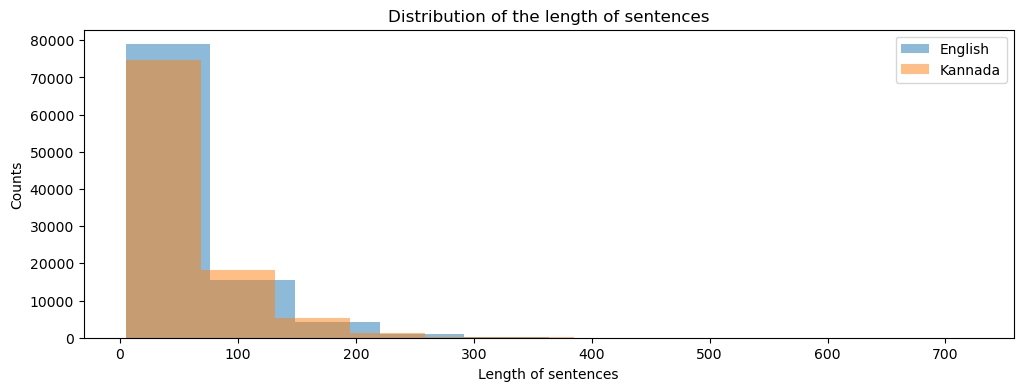

In [10]:
plt.figure(figsize=(12, 4))
plt.hist([len(sentence) for sentence in english_sentences], label="English", alpha=0.5)
plt.hist([len(sentence) for sentence in kannada_sentences], label="Kannada", alpha=0.5)
plt.title("Distribution of the length of sentences", fontsize=12)
plt.xlabel("Length of sentences")
plt.ylabel("Counts")
plt.legend(loc="upper right")
plt.show()

To accomplish this, we will use sentences in the 97th percentile.

In [11]:
PERCENTILE = 97
print(
    f"{PERCENTILE}th percentile length in English: {np.percentile([len(sentence) for sentence in english_sentences], PERCENTILE):.0f}"
)
print(
    f"{PERCENTILE}th percentile length in Kannada: {np.percentile([len(sentence) for sentence in kannada_sentences], PERCENTILE):.0f}"
)

97th percentile length in English: 179
97th percentile length in Kannada: 172


Since the maximum sentence lengths for English and Kannada are pretty close. We can comfortably pick a `max_sequence_length` of 200.

In [12]:
max_sequence_length = 200


def is_valid_tokens(sentence: str, vocab: list[str]) -> bool:
    for token in list(set(sentence)):
        if token not in vocab:
            return False
    return True


def is_valid_length(sentence: str, max_sequence_length: int) -> bool:
    return (
        len(list(sentence)) <= max_sequence_length - 1
    )  # need to re-add the end token so leaving 1 space


valid_sentence_indices = []
for index in range(len(english_sentences)):
    english_sentence, kannada_sentence = (
        english_sentences[index],
        kannada_sentences[index],
    )
    if (
        is_valid_tokens(english_sentence, english_vocabulary)
        and is_valid_length(english_sentence, max_sequence_length)
        and is_valid_tokens(kannada_sentence, kannada_vocabulary)
        and is_valid_length(kannada_sentence, max_sequence_length)
    ):
        valid_sentence_indices.append(index)


print(f"Number of English sentences: {len(english_sentences)}")
print(f"Number of Kannada sentences: {len(kannada_sentences)}")
print(f"Number of valid sentences: {len(valid_sentence_indices)}")

Number of English sentences: 100000
Number of Kannada sentences: 100000
Number of valid sentences: 81947


In [13]:
english_sentences = [english_sentences[i] for i in valid_sentence_indices]
kannada_sentences = [kannada_sentences[i] for i in valid_sentence_indices]

In [14]:
english_sentences[:3]

['Hes a scientist.',
 "'But we speak the truth aur ye sach hai ke Gujarat mein vikas pagal hogaya hai,'' Rahul Gandhi further said in Banaskantha",
 '8 lakh crore have been looted.']

In [15]:
kannada_sentences[:3]

['ಇವರು ಸಂಶೋಧಕ ಸ್ವಭಾವದವರು.',
 '"ಆದರೆ ಸತ್ಯ ಹೊರ ಬಂದೇ ಬರುತ್ತದೆ ಎಂದು ಹೇಳಿದ ರಾಹುಲ್ ಗಾಂಧಿ, ""ಸೂರತ್ ಜನರು ಚೀನಾದ ಜತೆ ಸ್ಪರ್ಧೆ ನಡೆಸುತ್ತಿದ್ದಾರೆ"',
 'ಕಳ್ಳತನವಾಗಿದ್ದ 8 ಲಕ್ಷ ರೂ.']

In [16]:
class TextDataset(Dataset):
    def __init__(self, english_sentences: list[str], kannada_sentences: list[str]):
        self.english_sentences = english_sentences
        self.kannada_sentences = kannada_sentences

    def __len__(self):
        return len(self.english_sentences)

    def __getitem__(self, idx):
        return self.english_sentences[idx], self.kannada_sentences[idx]

In [17]:
dataset = TextDataset(english_sentences, kannada_sentences)
len(dataset)

81947

In [18]:
dataset[0]

('Hes a scientist.', 'ಇವರು ಸಂಶೋಧಕ ಸ್ವಭಾವದವರು.')

## Batching Sentences

For this example, let's assume our batch size is 3. To explain why we're batching, let's say we take just one input English sentence and one Kannada translation as just the batch size (in this case, batch size would simply be 1 which is essentially no batching). So if we were to pass one English sentence and one Kannada sentence during training, we'll get some output loss and we're going to perform back propagation to update all of these millions of parameters in order to now, get a new state. Then, we will repeat this again with another input English sentence and Kannada sentence. Updating each and every single parameter for just a single input example is computationally expensive and takes a very long time. The loss steps will also be very unstable.

Therefore, in order to speed up the training, we parallelize passing information into the network by batching up the examples. In our case, we chose 3 examples that make up our batch each time information is fed into the network. After the loss for all three examples have been computed, only then we perform back propagation and update the parameters. So, we're essentially updating once for every three inputs. We can increase the batch size to decrease the number of times the entire network is going to be updated and this will speed up training and hence, for many machine learning algorithms, we use mini-batch gradient descent.

In [19]:
BATCH_SIZE = 3
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
iterator = iter(train_loader)

In [20]:
for batch_num, batch in enumerate(train_loader):
    print(batch)
    if batch_num > 3:  # print only first 4 batches
        break

[('Hes a scientist.', "'But we speak the truth aur ye sach hai ke Gujarat mein vikas pagal hogaya hai,'' Rahul Gandhi further said in Banaskantha", '8 lakh crore have been looted.'), ('ಇವರು ಸಂಶೋಧಕ ಸ್ವಭಾವದವರು.', '"ಆದರೆ ಸತ್ಯ ಹೊರ ಬಂದೇ ಬರುತ್ತದೆ ಎಂದು ಹೇಳಿದ ರಾಹುಲ್ ಗಾಂಧಿ, ""ಸೂರತ್ ಜನರು ಚೀನಾದ ಜತೆ ಸ್ಪರ್ಧೆ ನಡೆಸುತ್ತಿದ್ದಾರೆ"', 'ಕಳ್ಳತನವಾಗಿದ್ದ 8 ಲಕ್ಷ ರೂ.')]
[('I read a lot into this as well.', 'How did mankind come under Satans rival sovereignty?', 'And then I became Prime Minister.'), ('ಇದರ ಬಗ್ಗೆ ನಾನೂ ಸಾಕಷ್ಟು ಓದಿದ್ದೇನೆ.', 'ಮಾನವಕುಲವು ಸೈತಾನನ ಆಳಿಕೆಯ ಕೆಳಗೆ ಬಂದದ್ದು ಹೇಗೆ?', 'ನಂತರ ಪ್ರಧಾನಿ ಕೂಡ ಆಗುತ್ತೇನೆ.')]
[('What about corruption?', '"""The shooting of the film is 90 percent done."', 'the Special Statute'), ('ಭ್ರಷ್ಟಾಚಾರ ಏಕಿದೆ?', 'ಆ ಚಿತ್ರದ ಶೇ 90ರಷ್ಟು ಚಿತ್ರೀಕರಣವೂ ಈಗಾಗಲೇ ಮುಗಿದು ಹೋಗಿದೆ.', 'ವಿಶೇಷ ಕಾನೂನು')]
[('"Then the king said to Ittai the Gittite, ""Why do you also go with us? Return, and stay with the king. for you are a foreigner, and also an exile. Return to your own place."', 'What happened at the UN Ge

## Character to Number Encoding

Next, is tokenization. We have sentences and so, we need to convert these into numbers because computers don't understand text and they only understand numbers. The `tokenize` function below takes in a sentence, a language to index which contains the characters to numbers embedding and an optional start and end token. If we choose to have a start and end token, we will prepend and append the tokens respectively to the sentence. In most cases, we will also append padding tokens to sentences until they match the maximum sequence length.

In [21]:
def tokenize(
    sentence: str,
    language_to_index: dict[str, int],
    start_token: bool = True,
    end_token: bool = True,
) -> torch.tensor:
    sentence_word_indices = [language_to_index[char] for char in list(sentence)]
    if start_token:
        sentence_word_indices.insert(0, language_to_index[START_TOKEN])
    if end_token:
        sentence_word_indices.append(language_to_index[END_TOKEN])
    # Add padding tokens
    for _ in range(len(sentence_word_indices), max_sequence_length):
        sentence_word_indices.append(language_to_index[PADDING_TOKEN])
    return torch.tensor(sentence_word_indices)

In [22]:
batch

[('It has been under discussion for a long time.',
  'Buses cannot get there.',
  'Why then this tradition was not thought of?'),
 ('ಎಂಬುದು ಬಹಳ ದೀರ್ಘ ಕಾಲದಿಂದಲೂ ಚರ್ಚಿತವಾಗುತ್ತಿರುವ ವಿಷಯ.',
  'ಇಲ್ಲಿಗೆ ಬರಲು ಬಸ್ ಸೌಕರ್ಯವೂ ಇಲ್ಲ.',
  'ಆ ಪರಂಪರೆ ಯಾಕೆ ಮುನ್ನೆಲೆಗೆ ಬರಲಿಲ್ಲ?')]

For every sentence in the batch, we will call the `tokenize` function. For the English sentences, we don't have to use start and end tokens because we are passing every word into the network simultaneously anyways — we will have the entire English sentence.

As for the Kannada sentences, we require the start and end tokens because during the generation phase, the network is not going to have any kind of word to start with. Therefore, we have to inject something into the model and that will be the start token. Similarly, we pass in the end token to tell the network where the sentence ends. After that, it's just padding tokens.

In [23]:
english_tokenized, kannada_tokenized = [], []
for sentence_num in range(BATCH_SIZE):
    english_sentence, kannada_sentence = batch[0][sentence_num], batch[1][sentence_num]
    english_tokenized.append(
        tokenize(english_sentence, english_to_index, start_token=False, end_token=False)
    )
    kannada_tokenized.append(
        tokenize(kannada_sentence, kannada_to_index, start_token=True, end_token=True)
    )

english_tokenized = torch.stack(english_tokenized, dim=0)
kannada_tokenized = torch.stack(kannada_tokenized, dim=0)

print(english_tokenized.shape)
print(kannada_tokenized.shape)

torch.Size([3, 200])
torch.Size([3, 200])


In [24]:
english_tokenized

tensor([[41., 84.,  1., 72., 65., 83.,  1., 66., 69., 69., 78.,  1., 85., 78.,
         68., 69., 82.,  1., 68., 73., 83., 67., 85., 83., 83., 73., 79., 78.,
          1., 70., 79., 82.,  1., 65.,  1., 76., 79., 78., 71.,  1., 84., 73.,
         77., 69., 15., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96.,
         96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96.,
         96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96.,
         96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96.,
         96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96.,
         96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96.,
         96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96.,
         96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96.,
         96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96.,
         96., 96., 96., 96., 96., 96., 96., 96., 96.

## Masking

You'll see that we don't really need a typical type of masking for the encoder part. The only kind of masking the encoder requires is a padding mask. This padding mask simply tells the encoder not look at the padding tokens when the network is computing the loss function and updating the gradient weights. The padding tokens mean nothing. Therefore, we need a padding mask interjected in the encoder within the multi-head attention mechanism.

With the decoder, it requires a mass multi-headed attention mask. During inference, the decoder cannot look forward to what tokens should be generated. That's a form of data leakage if it were able to look ahead and we cannot have that. Therefore, what we do is we mask all the tokens that comes after a character. We are telling the network that we have no context of future words and the only context we can derive from are characters that came before. On top of this, we also have a padding mask (like in the encoder) that masks the padding tokens.

In [25]:
NEG_INFTY = 1e-9


def create_masks(english_batch, kannada_batch):
    assert len(english_batch) == len(kannada_batch)
    num_sentences = len(english_batch)
    look_ahead_mask = torch.full([max_sequence_length, max_sequence_length], True)
    look_ahead_mask = torch.triu(look_ahead_mask, diagonal=1)
    encoder_padding_mask = torch.full(
        [num_sentences, max_sequence_length, max_sequence_length], False
    )
    decoder_padding_mask_self_attention = torch.full(
        [num_sentences, max_sequence_length, max_sequence_length], False
    )
    decoder_padding_mask_cross_attention = torch.full(
        [num_sentences, max_sequence_length, max_sequence_length], False
    )

    for idx in range(num_sentences):
        english_sentence_len, kannada_sentence_len = len(english_batch[idx]), len(
            kannada_batch[idx]
        )
        english_chars_to_padding_mask = np.arange(
            english_sentence_len + 1, max_sequence_length
        )
        kannada_chars_to_padding_mask = np.arange(
            kannada_sentence_len + 1, max_sequence_length
        )
        # encoder padding mask
        encoder_padding_mask[idx, :, english_chars_to_padding_mask] = True
        encoder_padding_mask[idx, english_chars_to_padding_mask, :] = True
        # decoder padding mask for self-attention
        decoder_padding_mask_self_attention[
            idx, :, kannada_chars_to_padding_mask
        ] = True
        decoder_padding_mask_self_attention[
            idx, kannada_chars_to_padding_mask, :
        ] = True
        # decoder padding mask for cross attention
        decoder_padding_mask_cross_attention[
            idx, :, kannada_chars_to_padding_mask
        ] = True
        decoder_padding_mask_cross_attention[
            idx, kannada_chars_to_padding_mask, :
        ] = True

    encoder_self_attention_mask = torch.where(encoder_padding_mask, NEG_INFTY, 0)
    # look ahead mask prevents it from looking ahead at future words
    decoder_self_attention_mask = torch.where(
        look_ahead_mask + decoder_padding_mask_self_attention, NEG_INFTY, 0
    )
    decoder_cross_attention_mask = torch.where(
        decoder_padding_mask_cross_attention, NEG_INFTY, 0
    )

    print(
        f"encoder_self_attention_mask {encoder_self_attention_mask.size()}: {encoder_self_attention_mask[0, :10, :10]}"
    )
    print(
        f"decoder_self_attention_mask {decoder_self_attention_mask.size()}: {decoder_self_attention_mask[0, :10, :10]}"
    )
    print(
        f"decoder_cross_attention_mask {decoder_cross_attention_mask.size()}: {decoder_cross_attention_mask[0, :10, :10]}"
    )

    return (
        encoder_self_attention_mask,
        decoder_self_attention_mask,
        decoder_cross_attention_mask,
    )

In the `create_masks` function above, zeros are for values that are not masked and negative large numbers are to indicate masking. This is because we will be using the $\text{softmax}$ function which outputs a 1 for zeros and 0 for negative infinity. In this case, it will result in a very small value  which is close to zero because we are using a large negative number instead.

The reason why we are not using negative infinity is because we may end up with cases where entire rows are just zeros. This will lead to numerical instability which makes the network untrainable.

In [26]:
(
    encoder_self_attention_mask,
    decoder_self_attention_mask,
    decoder_cross_attention_mask,
) = create_masks(batch[0], batch[1])

encoder_self_attention_mask torch.Size([3, 200, 200]): tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
decoder_self_attention_mask torch.Size([3, 200, 200]): tensor([[0.0000e+00, 1.0000e-09, 1.0000e-09, 1.0000e-09, 1.0000e-09, 1.0000e-09,
         1.0000e-09, 1.0000e-09, 1.0000e-09, 1.0000e-09],
        [0.0000e+00, 0.0000e+00, 1.0000e-09, 1.0000e-09, 1.0000e-09, 1.0000e-09,
         1.0000e-09, 1.0000e-09, 1.0000e-09, 1.0000e-09],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e-09, 1.0000e-09, 1.0000e-09,
         1.0000e-09, 1.0000e-0

In [27]:
def get_device() -> str:
    return "cuda" if torch.cuda.is_available() else "cpu"

In [28]:
class SentenceEmbedding(nn.Module):
    """For a given sentence, create an embedding."""

    def __init__(
        self,
        max_sequence_length: int,
        d_model: int,
        language_to_idx: dict[str, int],
        START_TOKEN: bool,
        END_TOKEN: bool,
        PADDING_TOKEN: bool,
    ):
        super().__init__()
        self.vocab_size = len(language_to_idx)
        self.max_sequence_length = max_sequence_length
        self.embedding = nn.Embedding(self.vocab_size, d_model)
        self.language_to_idx = language_to_idx
        self.position_encoder = PositionalEncoding(d_model, max_sequence_length)
        self.dropout = nn.Dropout(p=0.1)
        self.START_TOKEN = START_TOKEN
        self.END_TOKEN = END_TOKEN
        self.PADDING_TOKEN = PADDING_TOKEN

    def batch_tokenize(
        self, batch: torch.tensor, start_token: bool = True, end_token: bool = True
    ) -> torch.tensor:
        def tokenize(sentence: str, start_token: bool = True, end_token: bool = True):
            sentence_word_indices = [
                self.language_to_idx[char] for char in list(sentence)
            ]
            if start_token:
                sentence_word_indices.insert(0, self.language_to_idx[self.START_TOKEN])
            if end_token:
                sentence_word_indices.append(self.language_to_idx[self.END_TOKEN])
            # Add padding tokens
            for _ in range(len(sentence_word_indices), self.max_sequence_length):
                sentence_word_indices.append(self.language_to_idx[self.PADDING_TOKEN])
            return torch.tensor(sentence_word_indices)

        tokenized = []
        for sentence_num in range(len(batch)):
            tokenized.append(tokenize(batch[sentence_num], start_token, end_token))
        tokenized = torch.stack(tokenized, dim=0)
        return tokenized.to(get_device())

    def forward(self, x, start_token: bool = True, end_token: bool = True):
        x = self.batch_tokenize(x, start_token, end_token)
        x = self.embedding(x)
        pos = self.position_encoder().to(get_device())
        x += pos
        x = self.dropout(x)
        return x